In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

 dim de X :  (1000, 2)
 dim de y :  (1000, 1)


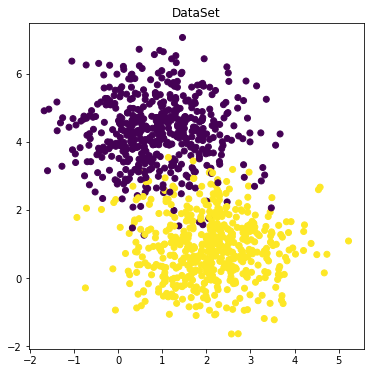

In [6]:
X , y = make_blobs(n_samples=1000 , n_features=2 , centers=2 , random_state=0)
y = y.reshape((y.shape[0],1))
print(' dim de X : ', X.shape)
print(' dim de y : ', y.shape)
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('DataSet')
plt.show()

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [4]:
def model(X,W,b):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A

In [5]:
def log_loss(A,y):
    return 1/len(y) *np.sum(-y*np.log(A)-(1-y)*np.log(1-A))


In [6]:
def gradients(A,X,y):
    return (1/len(y)  * np.dot(X.T,(A - y)) , 1/len(y) * np.sum(A-y))

     

In [7]:
def update(W,b,dW,db,learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W , b)

In [8]:
def predict(X,W,b):
    A = model(X,W,b)
    print(A)
    return A>= 0.5

In [9]:
def artificial_neuron(X ,y ,learning_rate = 0.1 ,n_iter = 100):
    W , b = initialisation(X)
    Loss = []
    for i in range(n_iter):
        A = model(X,W,b)
        Loss.append( log_loss(A,y))
        dW , db = gradients(A,X,y)
        W , b = update(W,b,dW,db,learning_rate)
    y_pred = predict(X,W,b)
    print(accuracy_score(y,y_pred))
    plt.plot(Loss)
    plt.show()
    return (W,b)
    

In [ ]:
Wf , bf = artificial_neuron(X ,y)

In [26]:
W , b = initialisation(X)
print(W.shape , b.shape)
A = model(X,W,b)
A.shape
log_loss(A,y)
dW , db = gradients(A,X,y)
dW.shape
update(W,b,dW,db,0.001)
Wf , bf

(2, 1) (1,)


In [13]:
plant1 = np.array([[2,1]])
plant2 = np.array([[3,5]])
( predict(plant2,Wf,bf) , predict(plant1,Wf,bf) )

[[0.34216094]]
[[0.8842076]]


(array([[False]]), array([[ True]]))

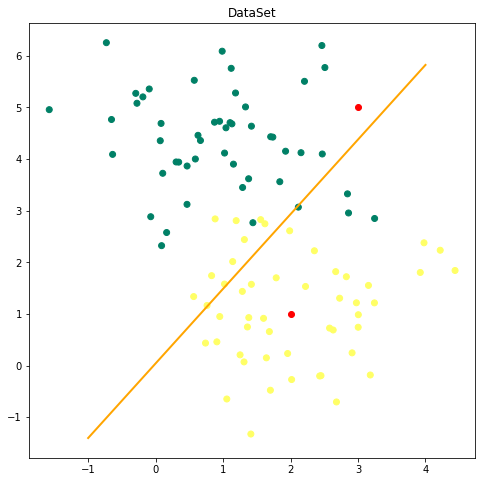

[[0.34216094]]
[[0.8842076]]


(array([[False]]), array([[ True]]))

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y , cmap='summer')
plt.scatter(plant1[:,0],plant1[:,1],c='red' )
plt.scatter(plant2[:,0],plant2[:,1],c='red')
#Tracer la ligne qui sépare les deux classes "c-à-d : Z = 0  => A = 0.5 "
ab = np.linspace(-1,4,100)
ord = (-Wf[0]*ab-bf)/Wf[1]
plt.plot(ab,ord,c='orange',lw=2)
plt.title('DataSet')
plt.show()
( predict(plant2,Wf,bf) , predict(plant1,Wf,bf) )
